In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# File paths
teams_stats_file = "./files/teams_stats_table.csv"
players_stats_file = "./files/players_stats_table.csv"
teams_file = "./files/teams_table.csv"

# Load the CSV files into dataframes
teams_stats_df = pd.read_csv(teams_stats_file)
players_stats_df = pd.read_csv(players_stats_file)
teams_df = pd.read_csv(teams_file)

In [3]:
df_list = [
    ("teams_stats_df", teams_stats_df),
    ("players_stats_df", players_stats_df),
    ("teams_df", teams_df),
]

# remove inf, -inf, and NaN values
for name, df in df_list:
    df.replace([float("inf"), -float("inf")], pd.NA, inplace=True)
    df.dropna(inplace=True)
    if name != "teams_df":
        # Convert 'timestamp' to datetime if it's not already in datetime format
        df["timestamp"] = pd.to_datetime(df["timestamp"])
        df["timestamp"] = df["timestamp"].dt.strftime("%Y-%m-%d")

In [4]:
# Descriptive statistics for team stats
teams_stats_summary = teams_stats_df.describe()

# Descriptive statistics for player stats
players_stats_summary = players_stats_df.describe()

# Descriptive statistics for teams
teams_summary = teams_df.describe()

print("Teams Statistics Summary:\n", teams_stats_summary)
print("Players Statistics Summary:\n", players_stats_summary)
print("Teams Summary:\n", teams_summary)

Teams Statistics Summary:
        total_free_throw_attempts  total_free_throw_made  \
count                 588.000000             588.000000   
mean                    6.715986               8.083333   
std                     3.937668               4.869142   
min                     0.000000               0.000000   
25%                     4.000000               4.000000   
50%                     6.000000               8.000000   
75%                     9.000000              11.000000   
max                    26.000000              28.000000   

       total_two_point_attempts  total_two_point_made  total_three_point_made  \
count                588.000000            588.000000              588.000000   
mean                  21.784014             17.511905                4.302721   
std                    7.608787              6.437607                2.838683   
min                    0.000000              0.000000                0.000000   
25%                   17.000000     

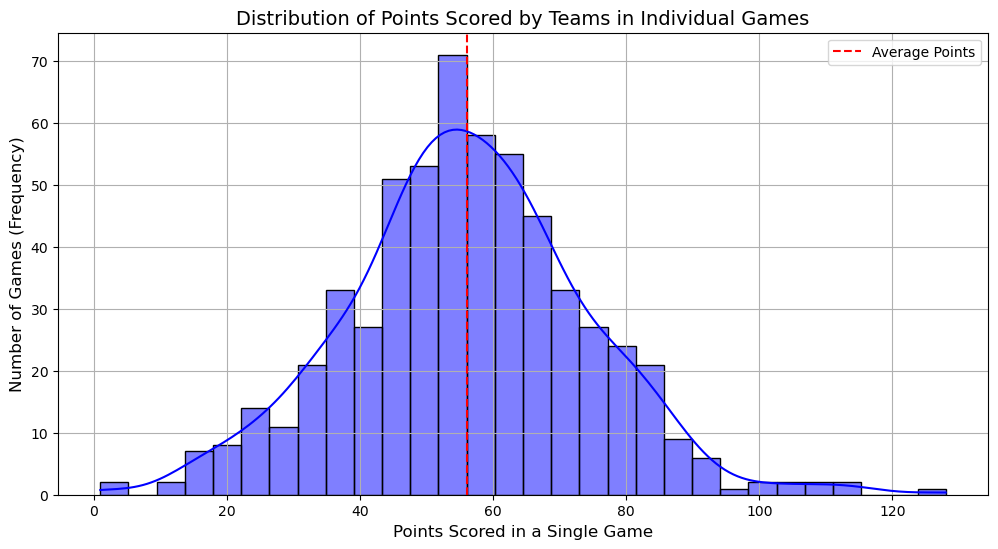

In [5]:
# Enhanced plot for Distribution of Total Points by Teams in Each Game
plt.figure(figsize=(12, 6))

# Plot with KDE to show density as well
sns.histplot(teams_stats_df["total_points"], bins=30, kde=True, color="blue")

# Adding descriptive titles and axis labels
plt.title("Distribution of Points Scored by Teams in Individual Games", fontsize=14)
plt.xlabel("Points Scored in a Single Game", fontsize=12)
plt.ylabel("Number of Games (Frequency)", fontsize=12)

# Displaying gridlines for better readability
plt.grid(True)

# Optional: Show or describe common point ranges
plt.axvline(
    teams_stats_df["total_points"].mean(),
    color="red",
    linestyle="--",
    label="Average Points",
)
plt.legend()

# Show plot
plt.show()

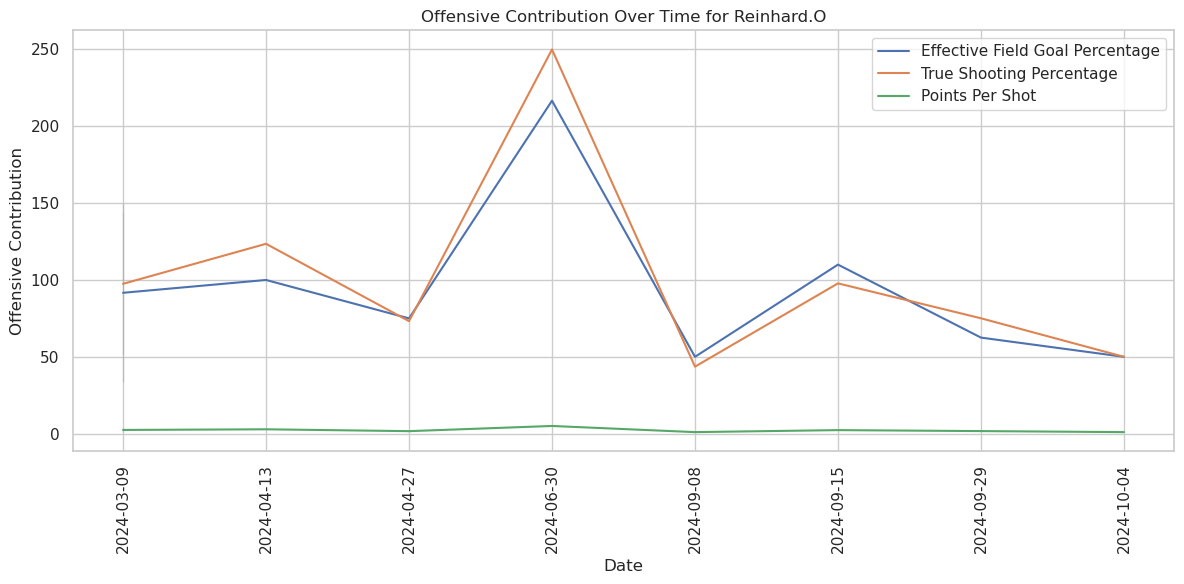

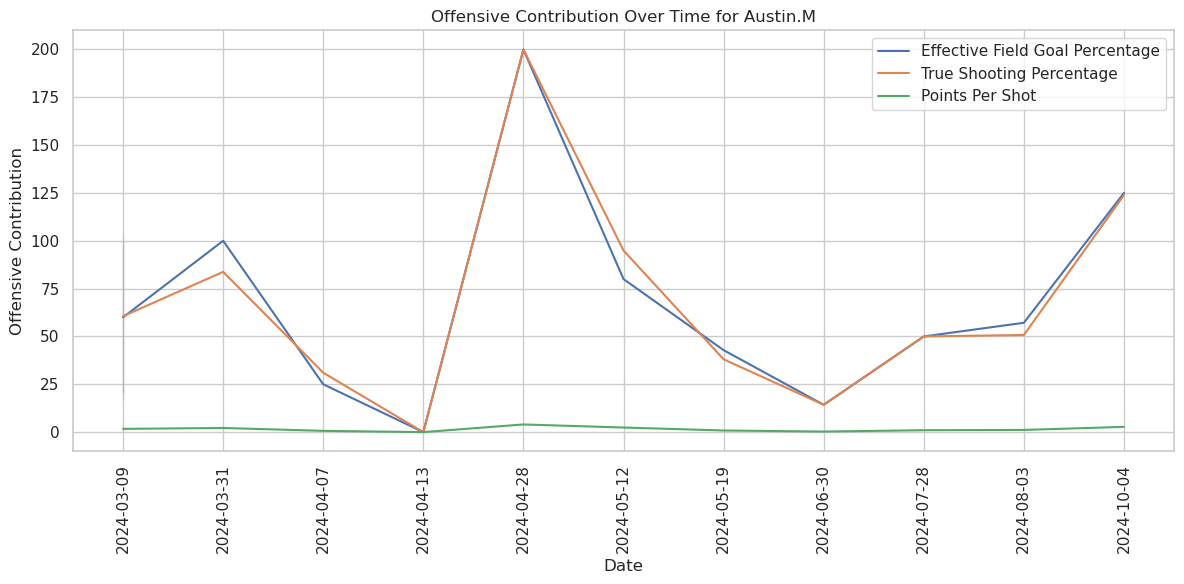

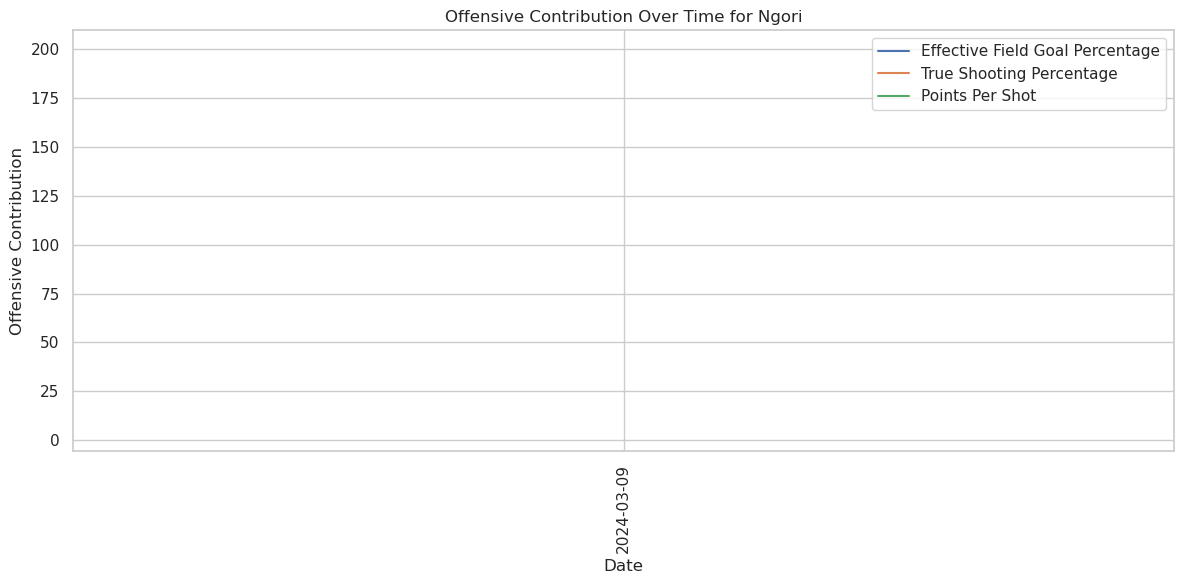

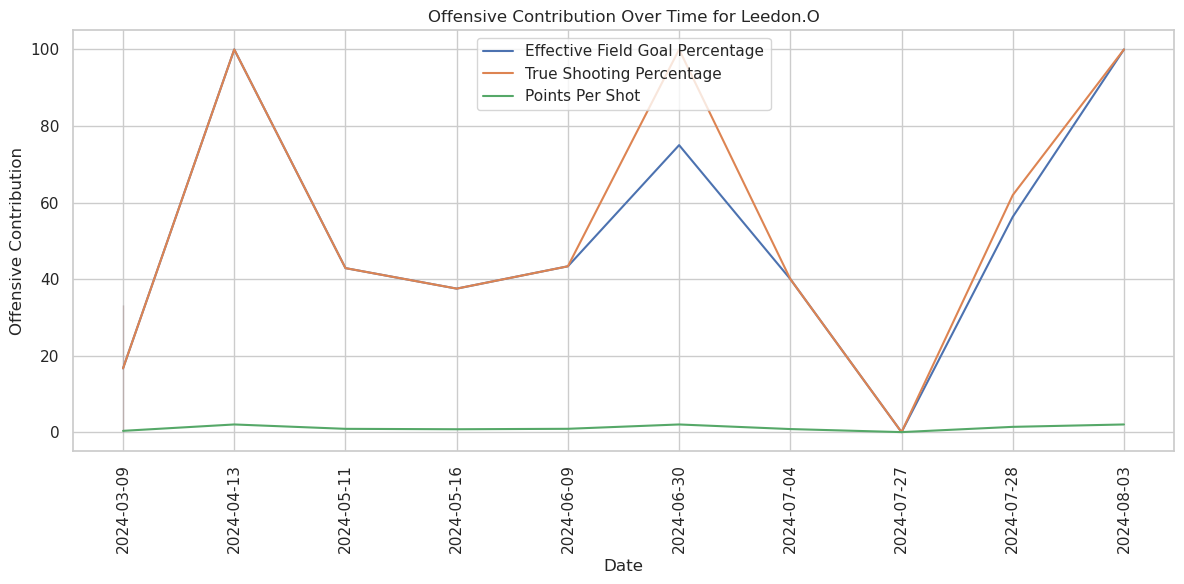

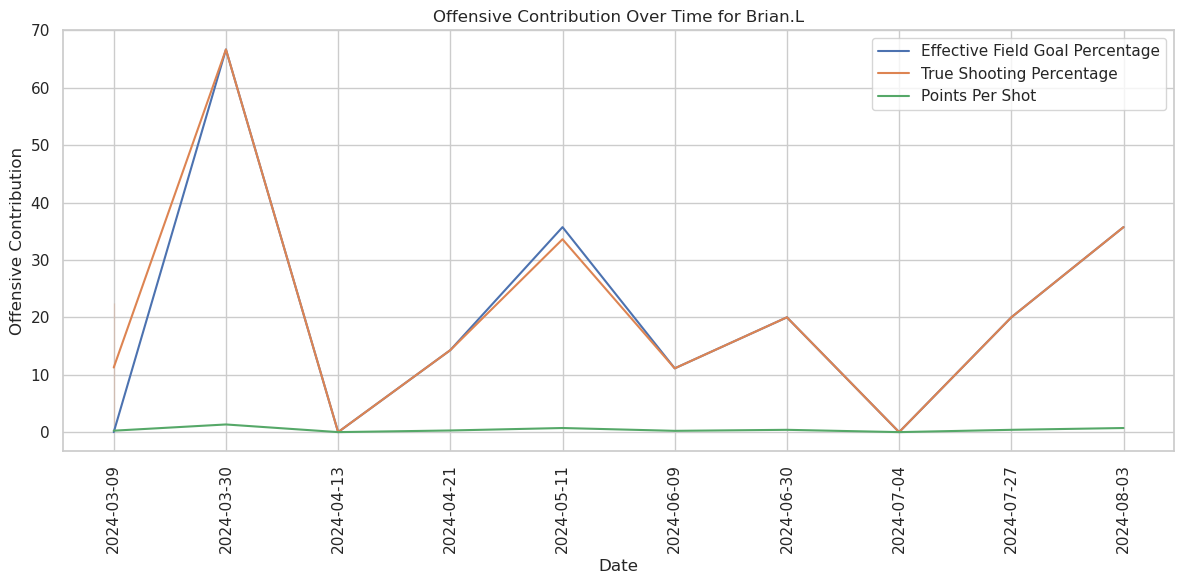

In [6]:
# Sort the data by timestamp to ensure chronological order
players_stats_df = players_stats_df.sort_values(by=["timestamp"])

# This logic will be wrapped in a function in the final product
# Filter for a specific player

count = 0
for name in players_stats_df["player_name"].unique():
    count += 1
    if count > 5:
        break

    # Filter for a specific player
    player_df = players_stats_df[players_stats_df["player_name"] == name]

    # Create a line plot for eFG%, TS%, and PPS over time
    plt.figure(figsize=(12, 6))

    # Create a line plot
    sns.set_theme(style="whitegrid")  # Set the plot style
    sns.lineplot(
        x="timestamp", y="eFG", data=player_df, label="Effective Field Goal Percentage"
    )
    sns.lineplot(
        x="timestamp", y="TS", data=player_df, label="True Shooting Percentage"
    )
    sns.lineplot(x="timestamp", y="PPS", data=player_df, label="Points Per Shot")

    # Add title, labels, and legend
    plt.title(f"Offensive Contribution Over Time for {name}")
    plt.xlabel("Date")
    plt.ylabel("Offensive Contribution")
    plt.legend()

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

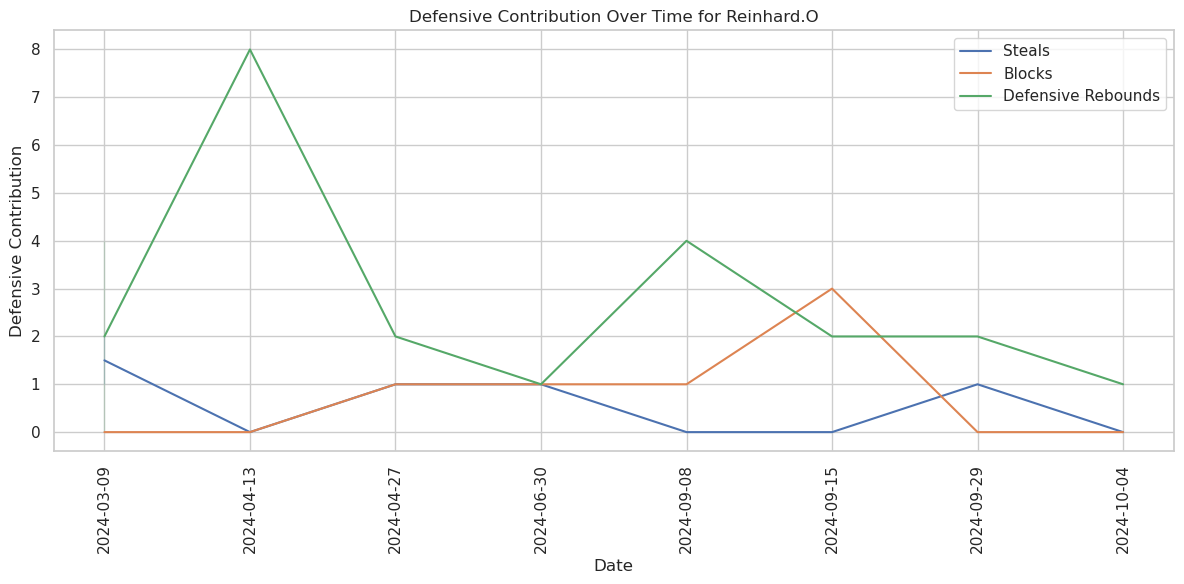

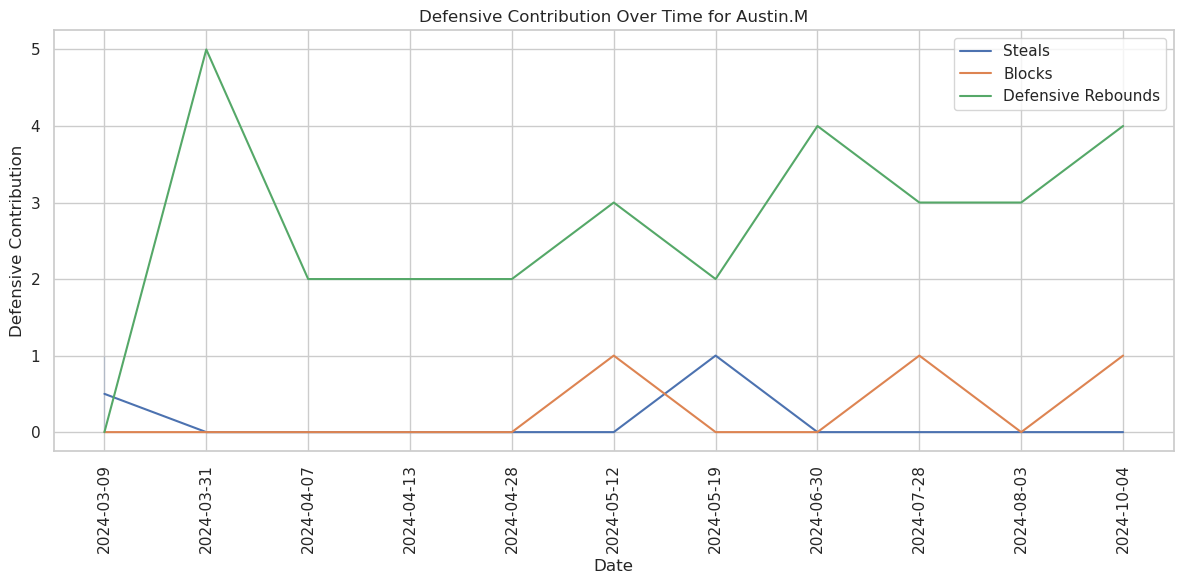

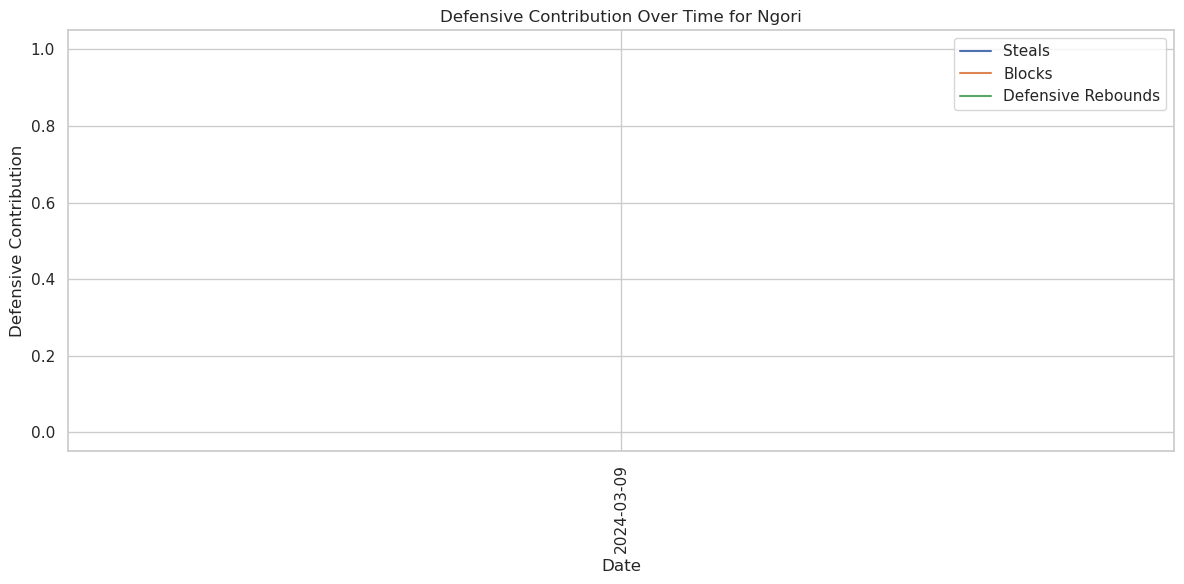

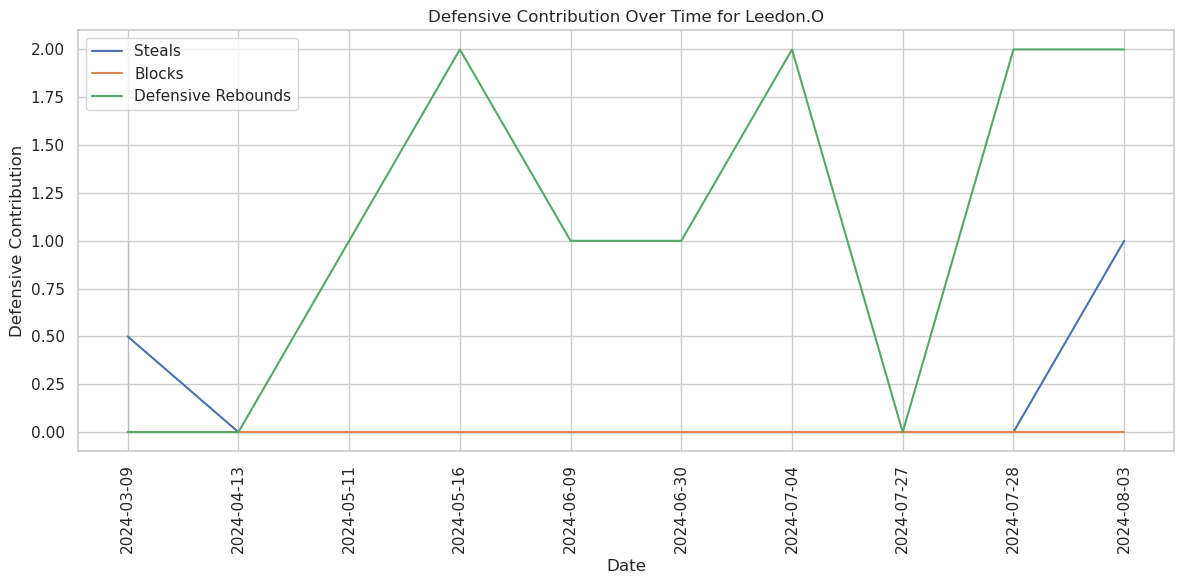

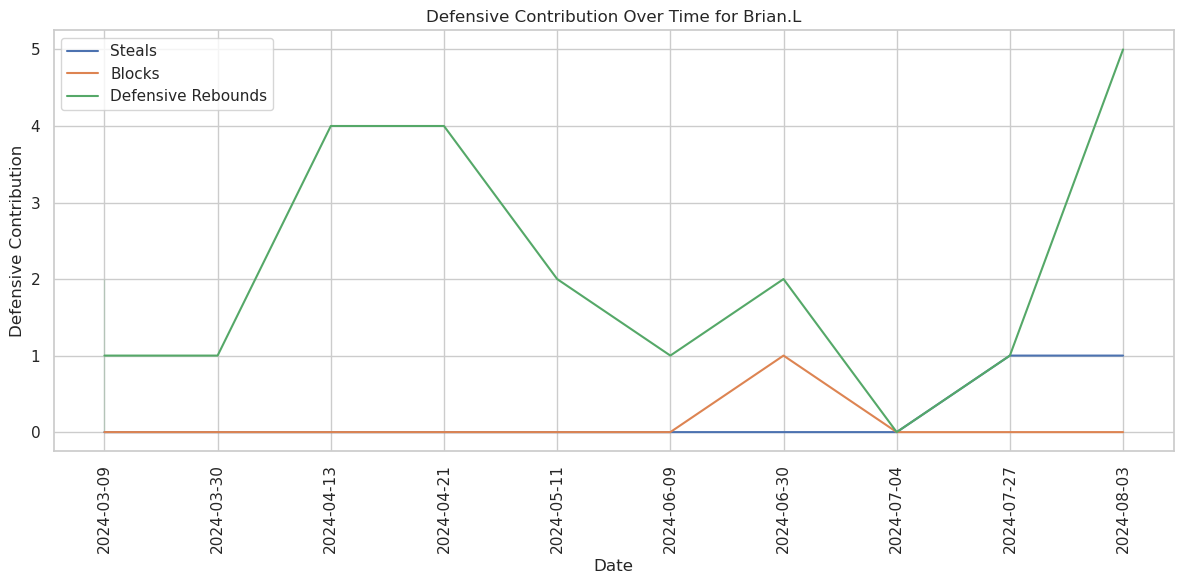

In [7]:
# This logic will be wrapped in a function in the final product
# Filter for a specific player

count = 0
for name in players_stats_df["player_name"].unique():
    count += 1
    if count > 5:
        break

    # Filter for a specific player
    player_df = players_stats_df[players_stats_df["player_name"] == name]

    # Create a line plot for Steals, Blocks, and Defensive Rebounds over time
    plt.figure(figsize=(12, 6))

    # Create a line plot
    sns.set_theme(style="whitegrid")  # Set the plot style
    sns.lineplot(
        x="timestamp", y="steals", data=player_df, label="Steals"
    )
    sns.lineplot(
        x="timestamp", y="blocks", data=player_df, label="Blocks"
    )
    sns.lineplot(x="timestamp", y="defensive_rebounds", data=player_df, label="Defensive Rebounds")

    # Add title, labels, and legend
    plt.title(f"Defensive Contribution Over Time for {name}")
    plt.xlabel("Date")
    plt.ylabel("Defensive Contribution")
    plt.legend()

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

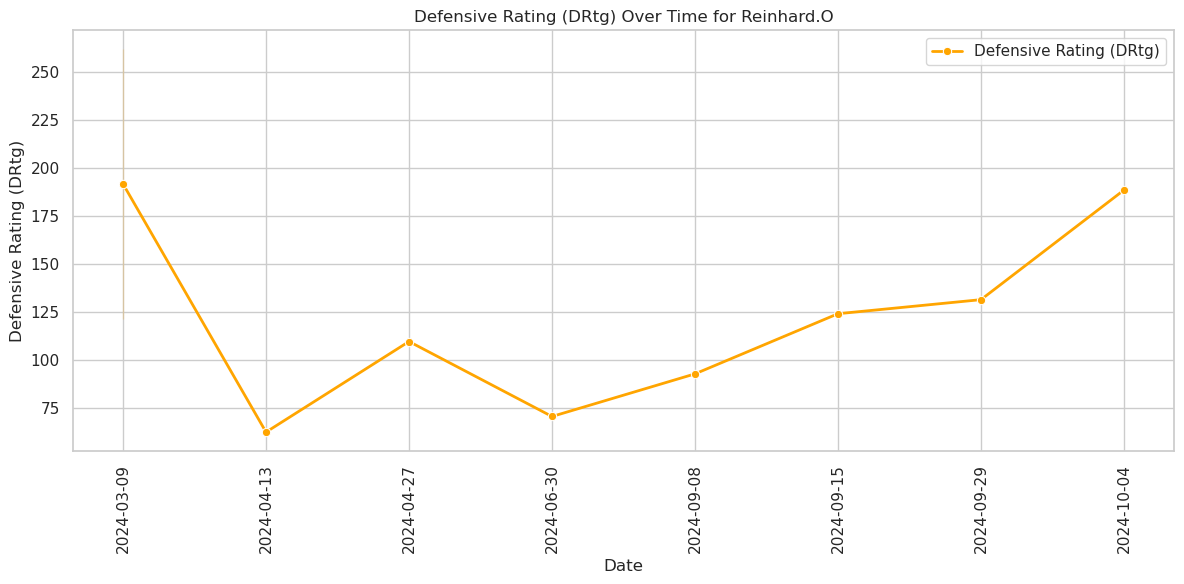

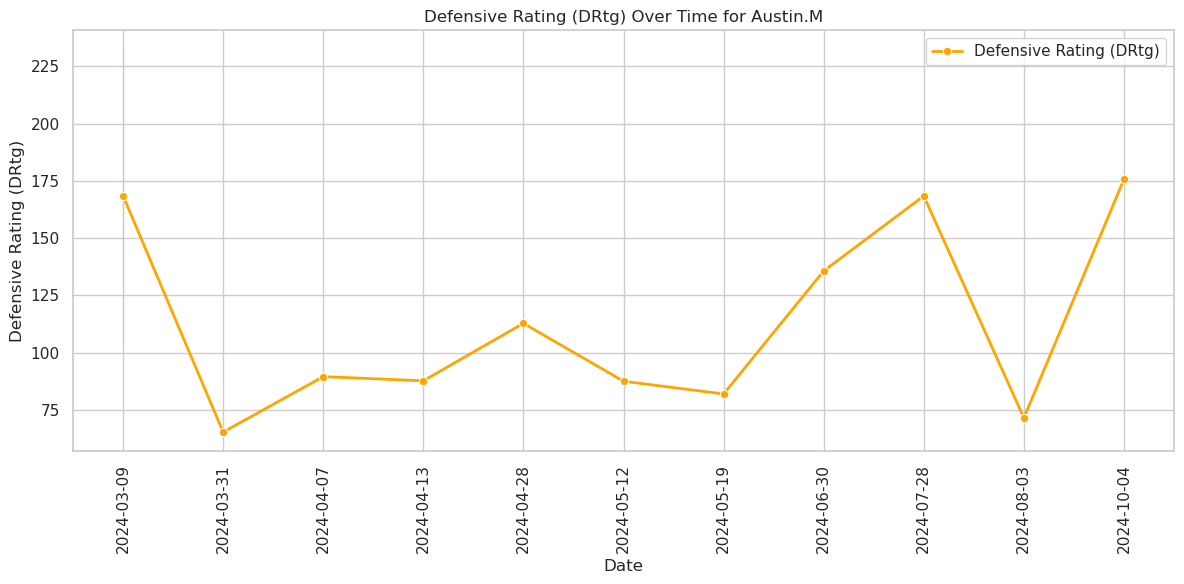

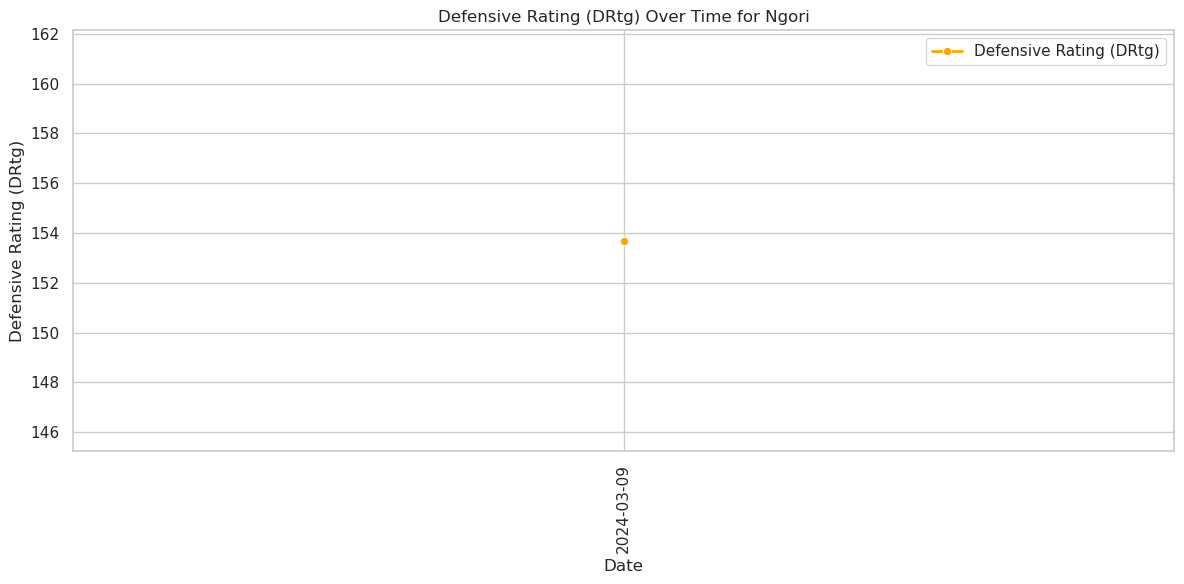

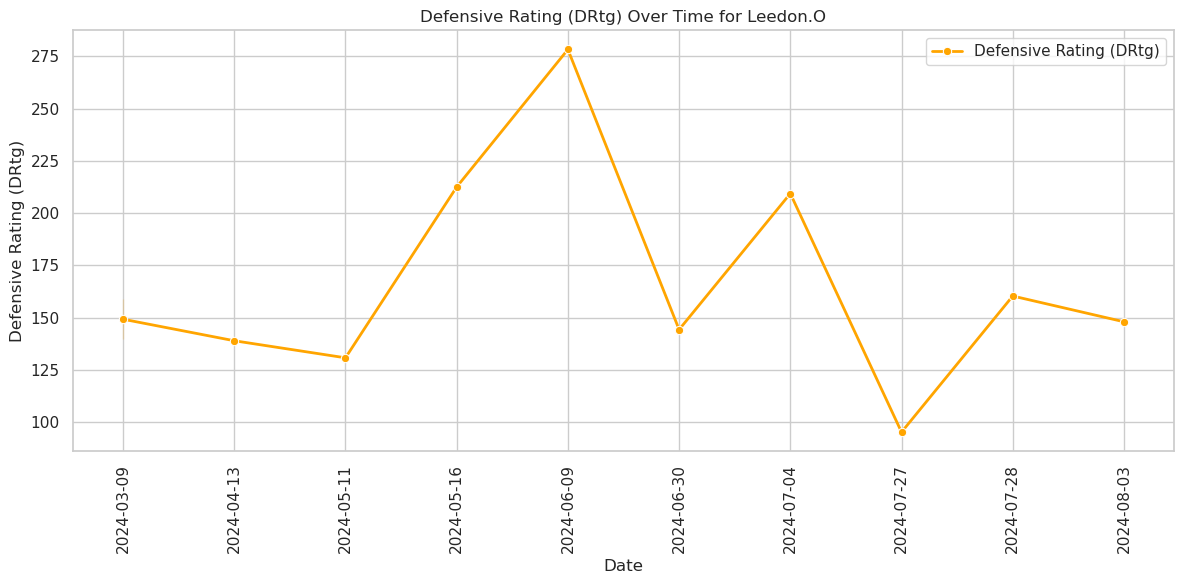

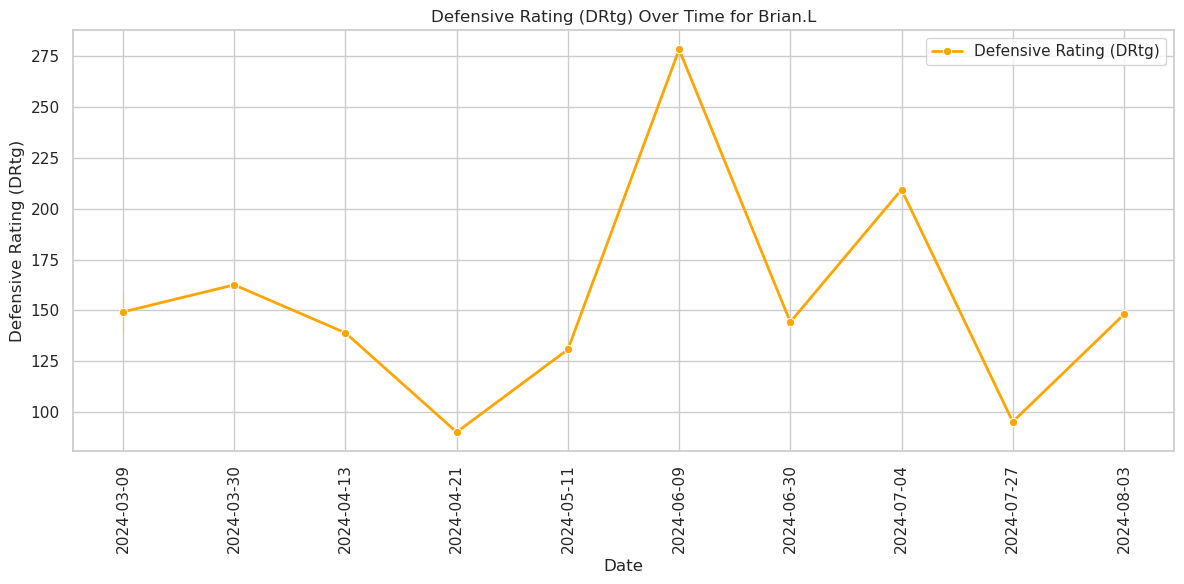

In [8]:
count = 0
for name in players_stats_df["player_name"].unique():
    count += 1
    if count > 5:
        break

    # Filter for a specific player
    player_df = players_stats_df[players_stats_df["player_name"] == name]

    # Create a line plot for Defensive Rating (DRtg) over time
    plt.figure(figsize=(12, 6))

    # Create a line plot using sns
    sns.set_theme(style="whitegrid")  # Set the plot style
    sns.lineplot(
        x="timestamp",  # x-axis for timestamps
        y="defensive_contribution",  # y-axis for Defensive Rating
        data=player_df,  # Data source
        label="Defensive Rating (DRtg)",  # Label for the line
        color="orange",  # Line color
        marker="o",  # Line marker
        linewidth=2  # Line width
    )
    
    # Add title, labels, and rotate x-axis labels
    plt.title(f'Defensive Rating (DRtg) Over Time for {name}')
    plt.xlabel('Date')
    plt.ylabel('Defensive Rating (DRtg)')
    plt.xticks(rotation=90)  # Rotate x-axis labels
    
    # Show the plot
    plt.tight_layout()
    plt.show()

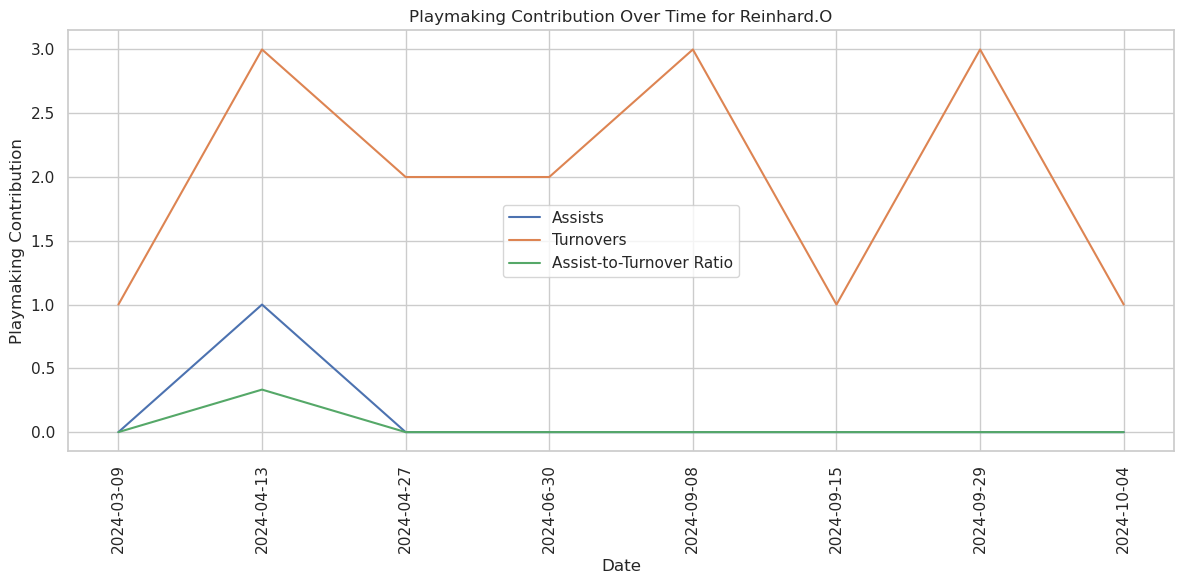

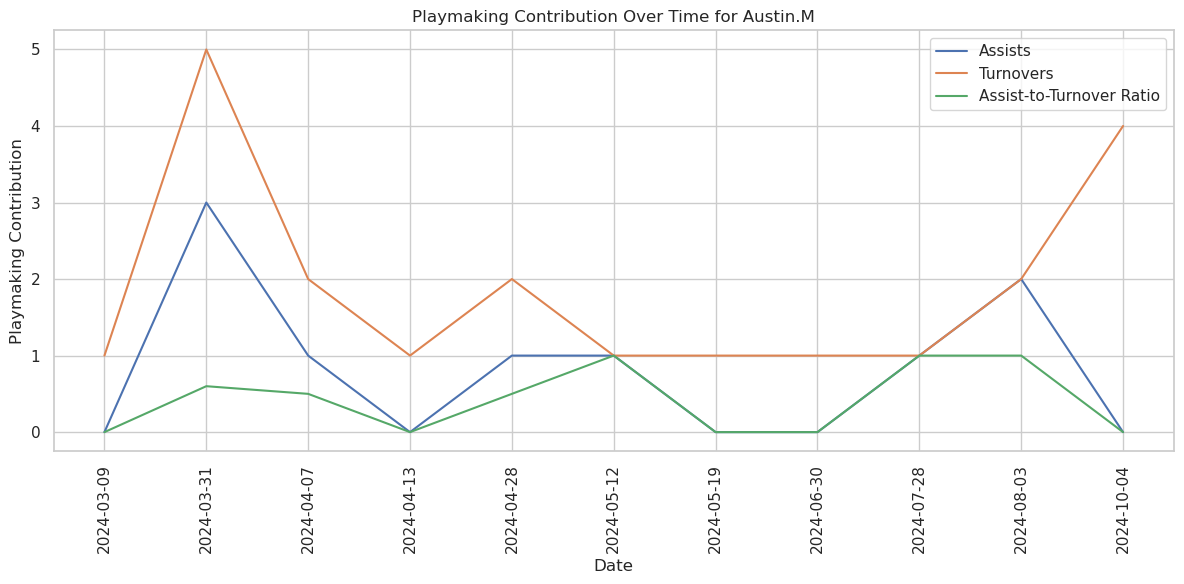

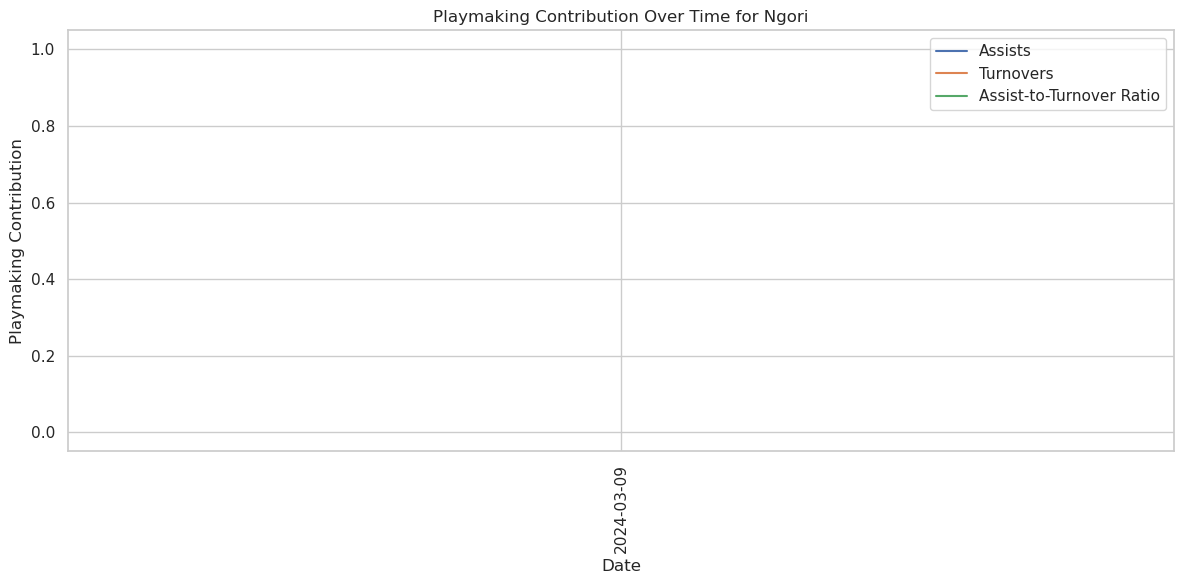

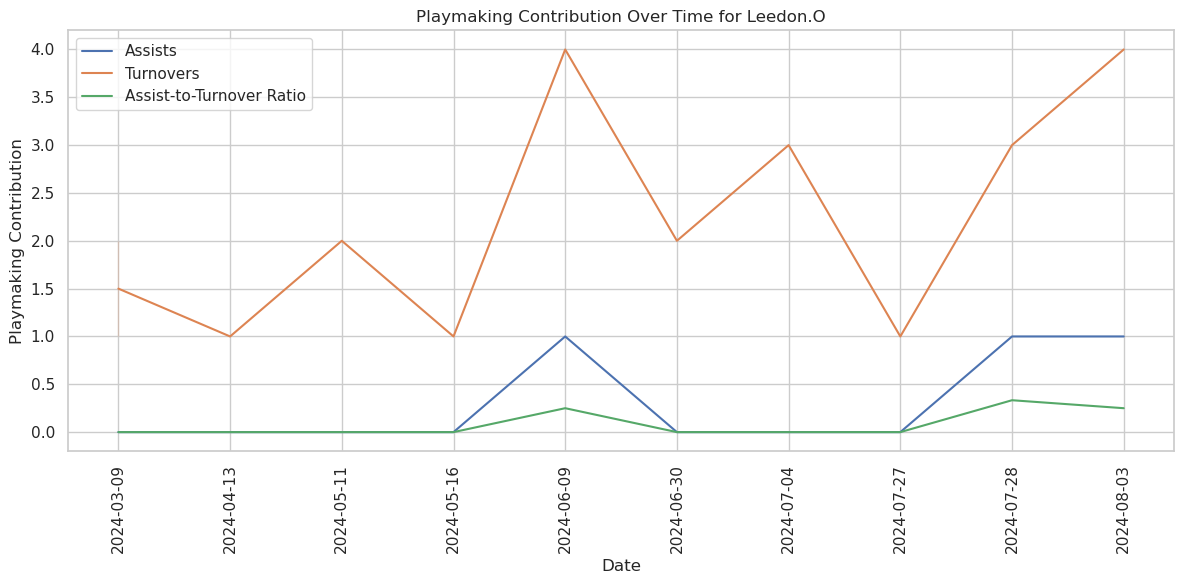

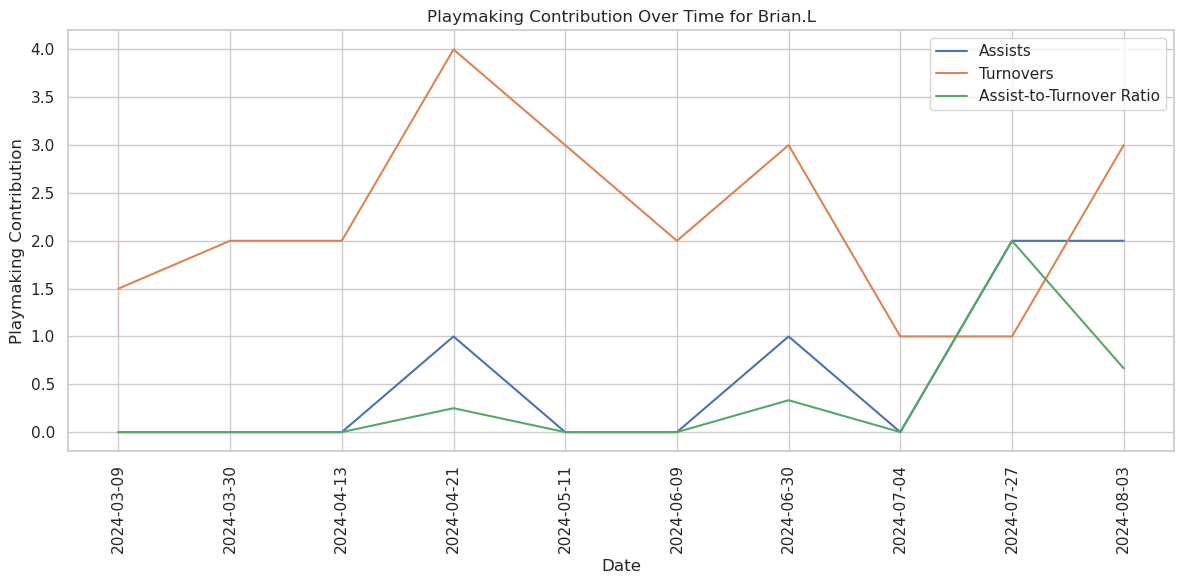

In [9]:
count = 0
for name in players_stats_df["player_name"].unique():
    count += 1
    if count > 5:
        break

    # Filter for a specific player
    player_df = players_stats_df[players_stats_df["player_name"] == name]

    # Create a line plot for Assists, Turnovers, and Playmaking/Assist-to-Turnover Ratio over time
    plt.figure(figsize=(12, 6))

    # Create a line plot
    sns.set_theme(style="whitegrid")  # Set the plot style
    sns.lineplot(
        x="timestamp", y="assists", data=player_df, label="Assists"
    )
    sns.lineplot(
        x="timestamp", y="turnovers", data=player_df, label="Turnovers"
    )
    sns.lineplot(x="timestamp", y="playmaking", data=player_df, label="Assist-to-Turnover Ratio")

    # Add title, labels, and legend
    plt.title(f"Playmaking Contribution Over Time for {name}")
    plt.xlabel("Date")
    plt.ylabel("Playmaking Contribution")
    plt.legend()

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

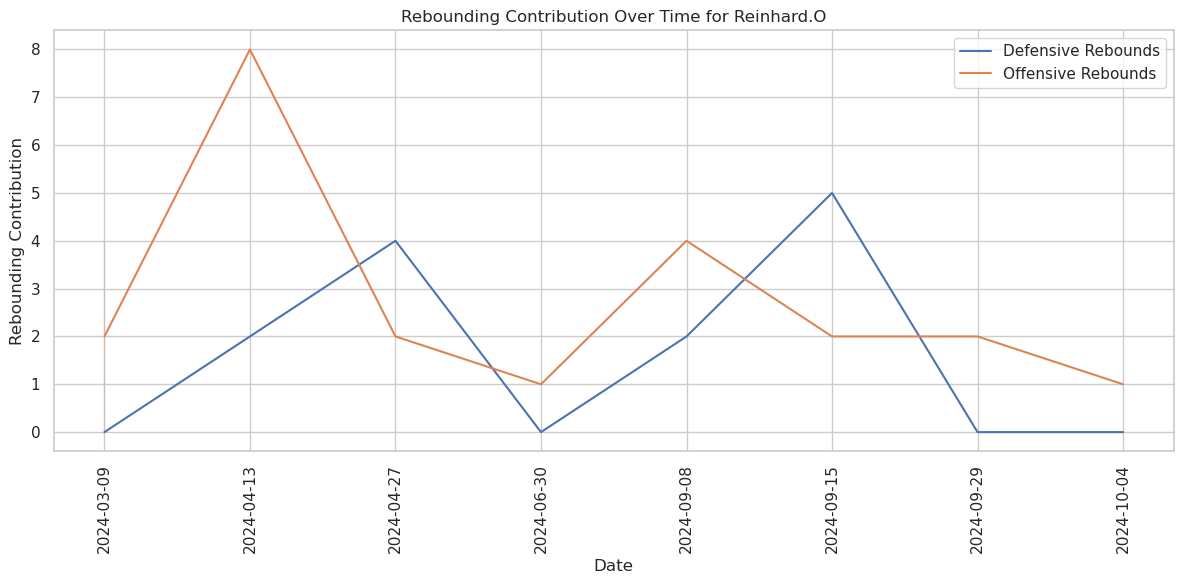

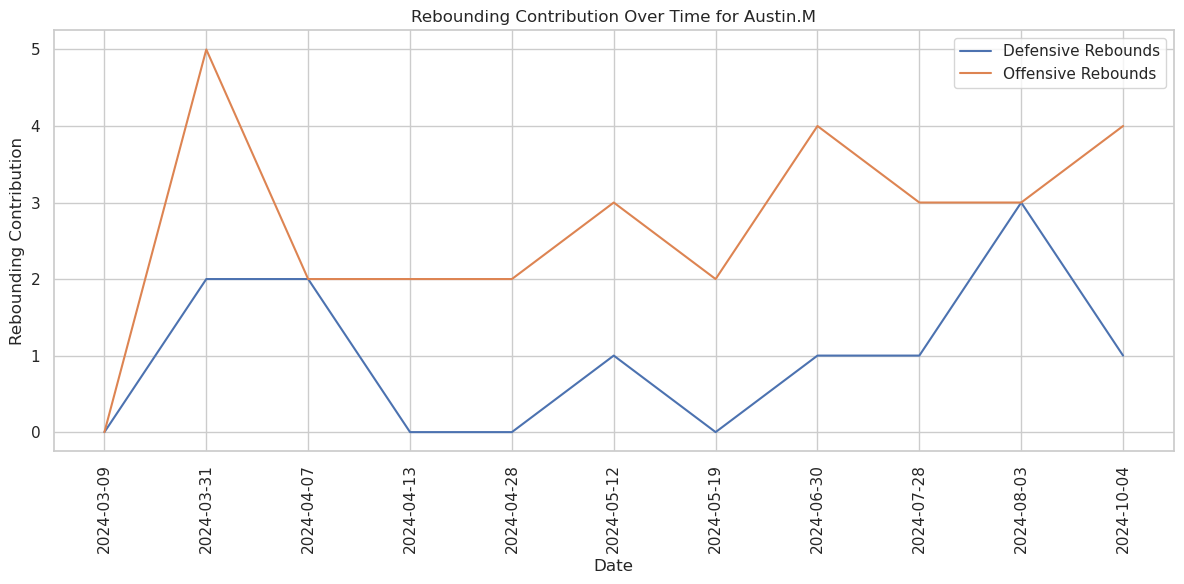

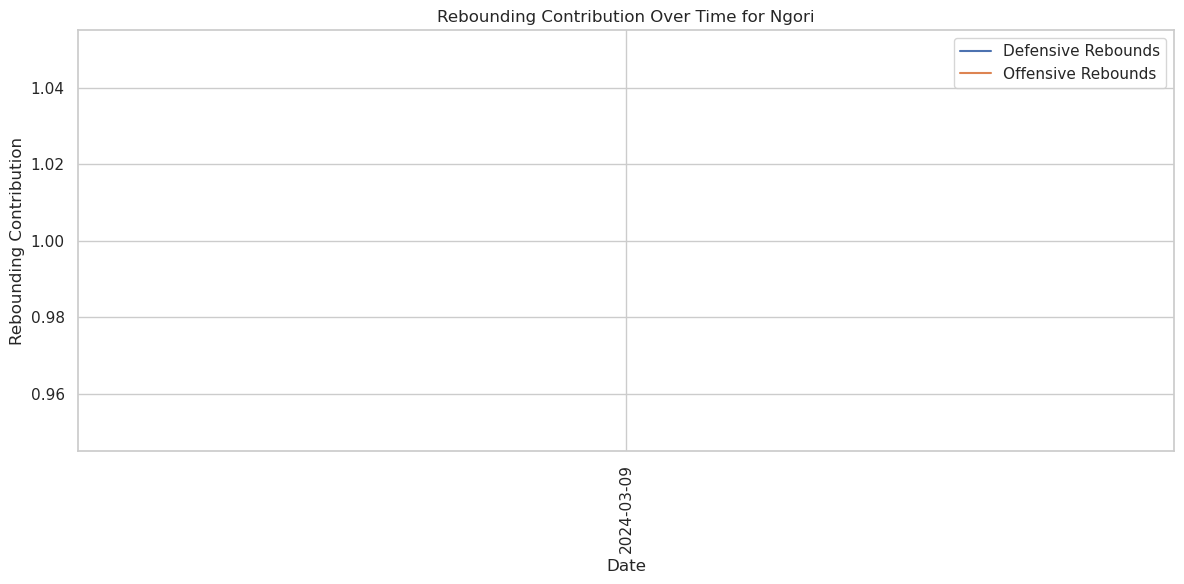

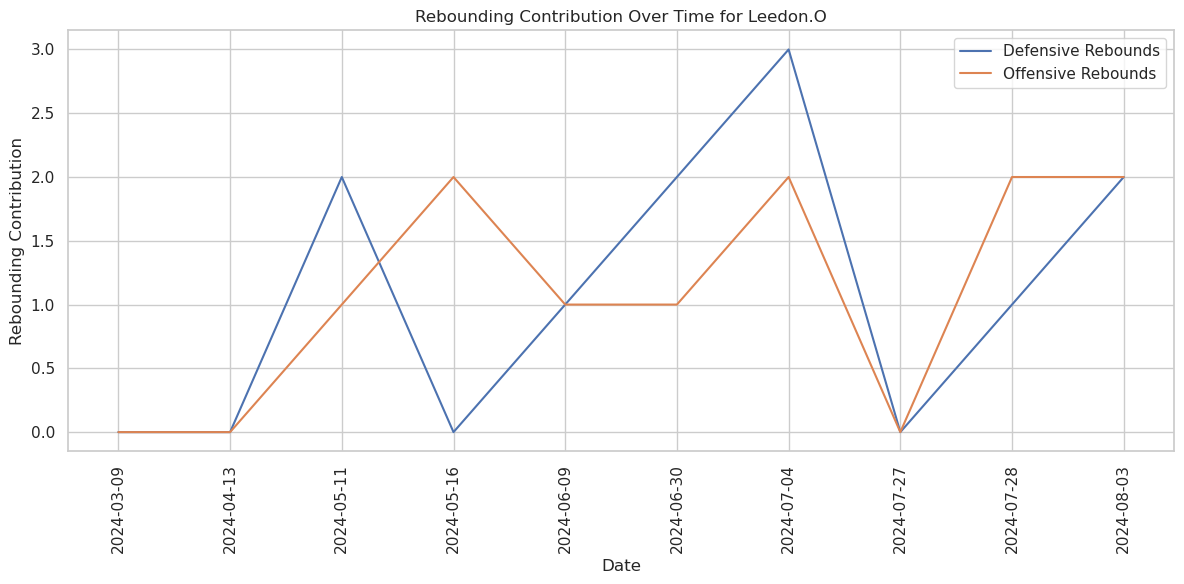

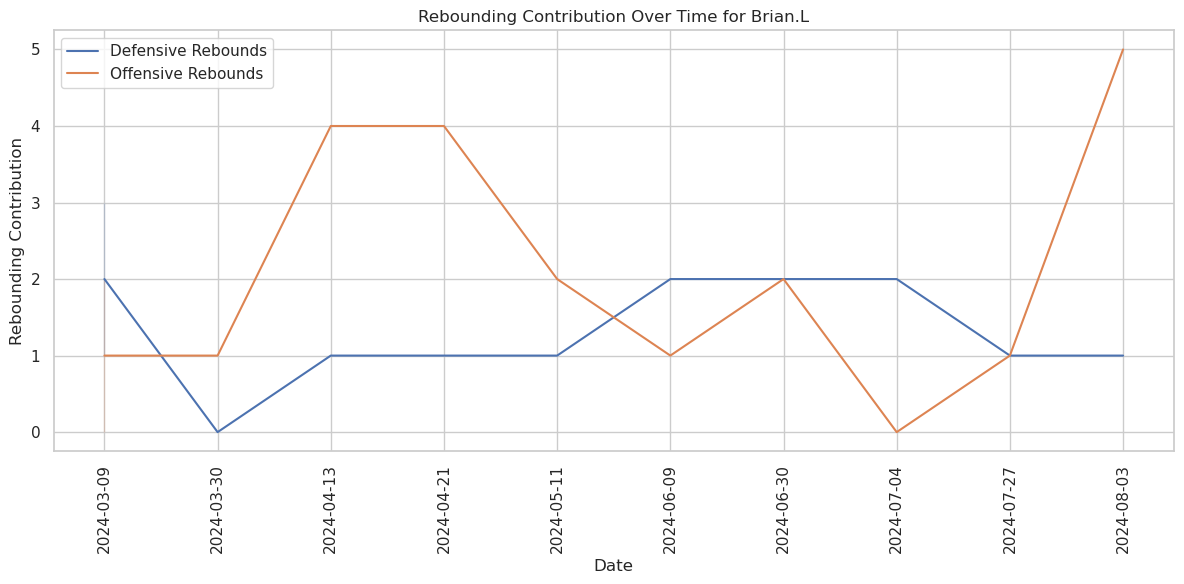

In [10]:
count = 0
for name in players_stats_df["player_name"].unique():
    count += 1
    if count > 5:
        break

    # Filter for a specific player
    player_df = players_stats_df[players_stats_df["player_name"] == name]

    # Create a line plot for Offensive and Defensive Rebounds over time
    plt.figure(figsize=(12, 6))

    # Create a line plot
    sns.set_theme(style="whitegrid")  # Set the plot style
    sns.lineplot(
        x="timestamp", y="offensive_rebounds", data=player_df, label="Defensive Rebounds"
    )
    sns.lineplot(
        x="timestamp", y="defensive_rebounds", data=player_df, label="Offensive Rebounds"
    )

    # Add title, labels, and legend
    plt.title(f"Rebounding Contribution Over Time for {name}")
    plt.xlabel("Date")
    plt.ylabel("Rebounding Contribution")
    plt.legend()

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

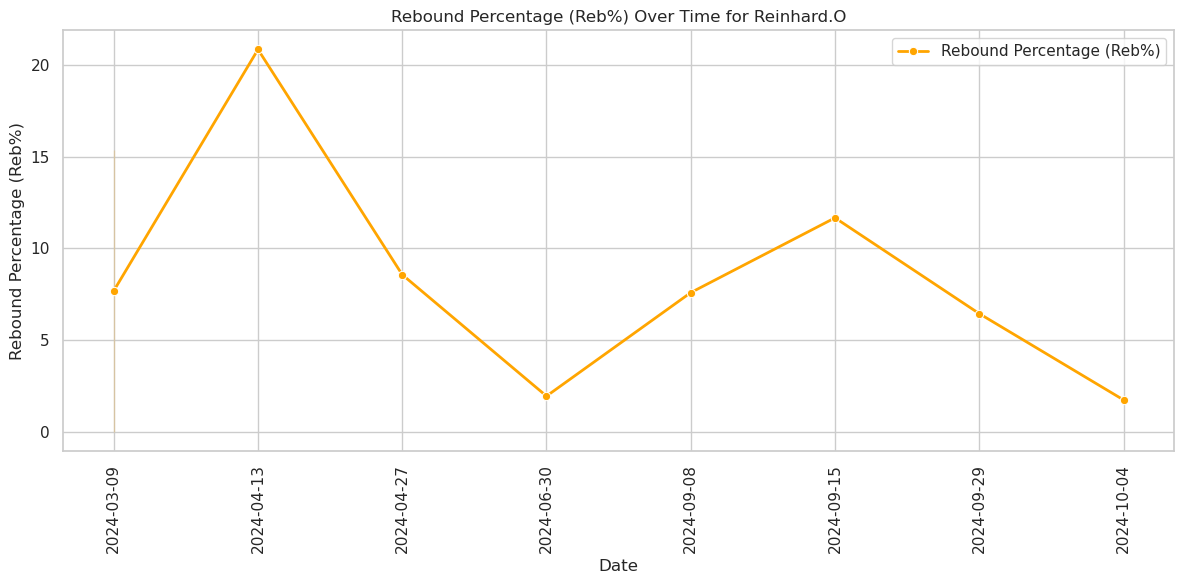

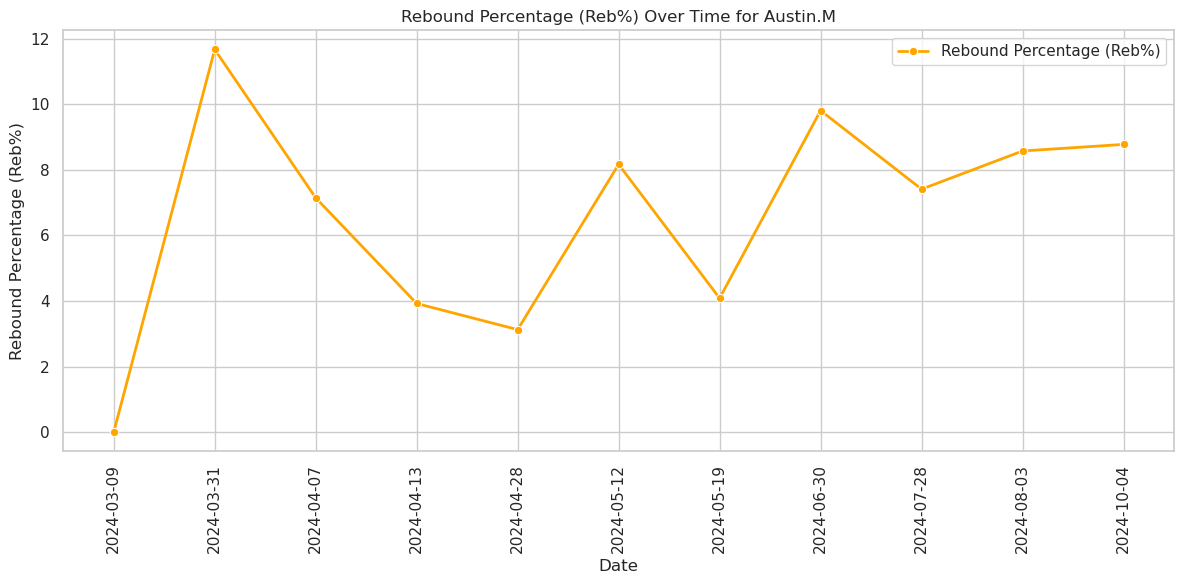

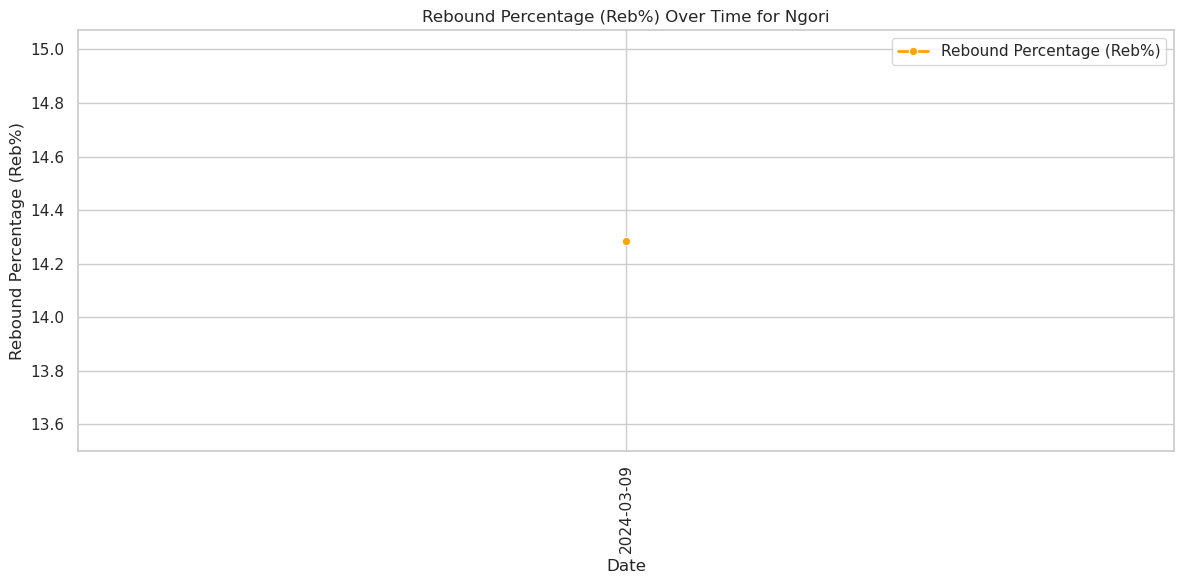

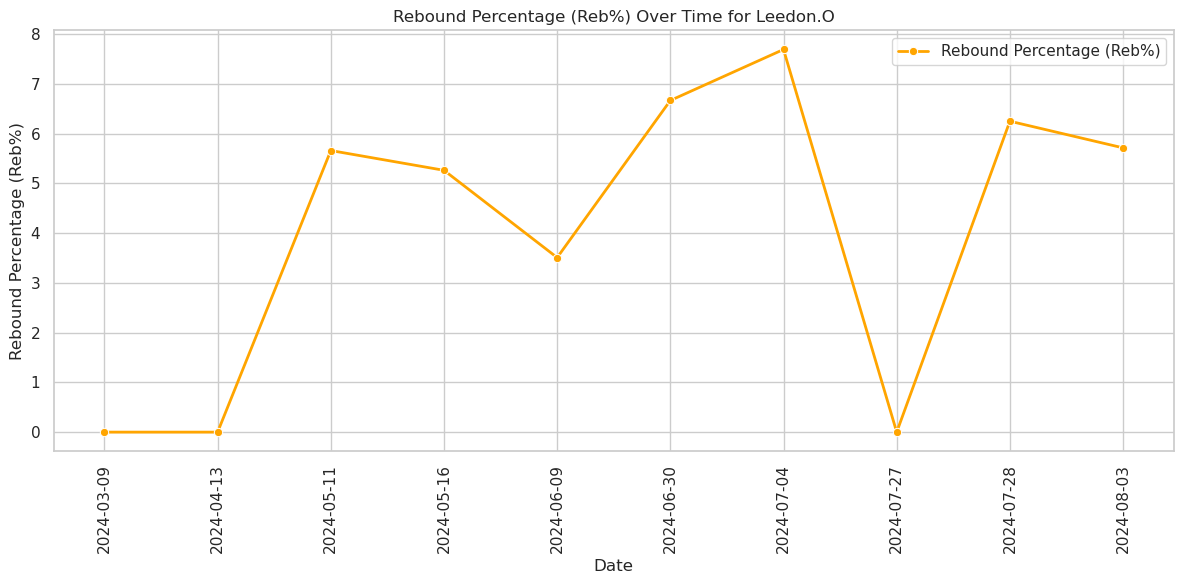

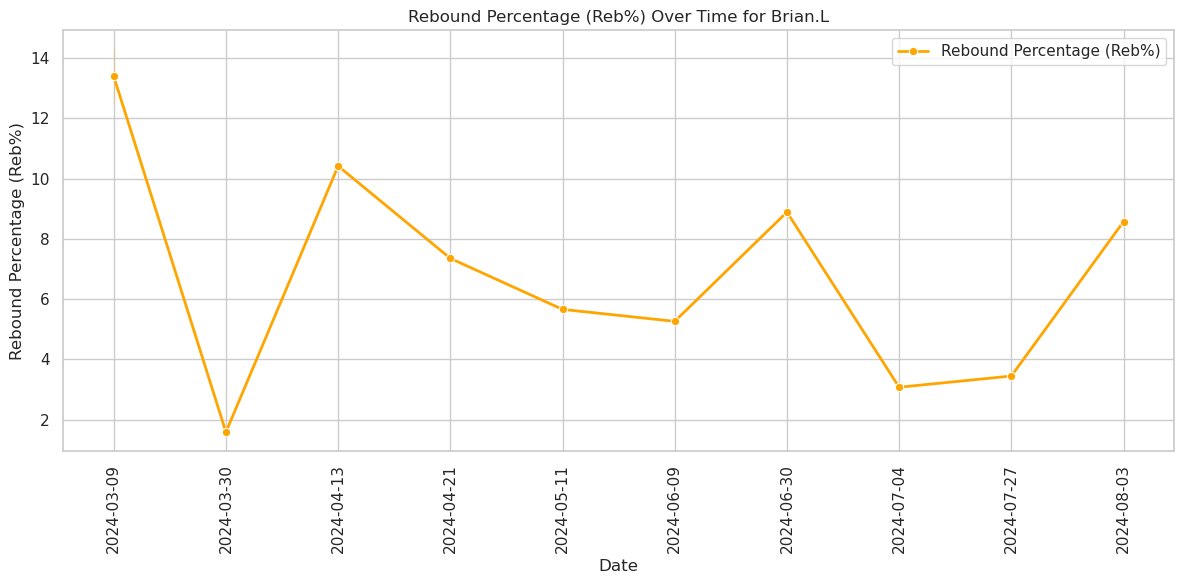

In [11]:
count = 0
for name in players_stats_df["player_name"].unique():
    count += 1
    if count > 5:
        break

    # Filter for a specific player
    player_df = players_stats_df[players_stats_df["player_name"] == name]

    # Create a line plot for Rebound Percentage (Reb%) over time
    plt.figure(figsize=(12, 6))

    # Create a line plot using sns
    sns.set_theme(style="whitegrid")  # Set the plot style
    sns.lineplot(
        x="timestamp",  # x-axis for timestamps
        y="rebound_percentage",  # y-axis for Defensive Rating
        data=player_df,  # Data source
        label="Rebound Percentage (Reb%)",  # Label for the line
        color="orange",  # Line color
        marker="o",  # Line marker
        linewidth=2  # Line width
    )
    
    # Add title, labels, and rotate x-axis labels
    plt.title(f'Rebound Percentage (Reb%) Over Time for {name}')
    plt.xlabel('Date')
    plt.ylabel('Rebound Percentage (Reb%)')
    plt.xticks(rotation=90)  # Rotate x-axis labels
    
    # Show the plot
    plt.tight_layout()
    plt.show()

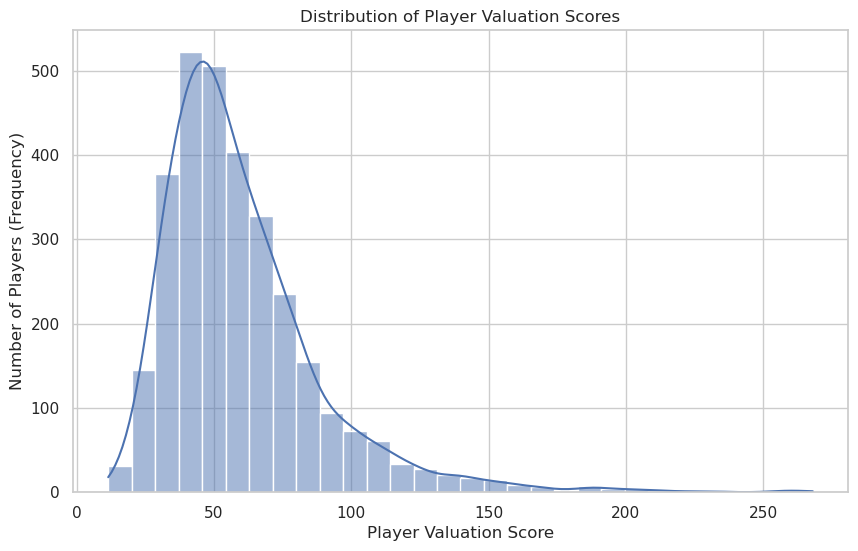

In [12]:
# Visualize distribution of player valuation score
plt.figure(figsize=(10, 6))
sns.histplot(players_stats_df["player_valuation_score"].dropna(), bins=30, kde=True)
plt.title("Distribution of Player Valuation Scores")
plt.xlabel("Player Valuation Score")
plt.ylabel("Number of Players (Frequency)")
plt.show()

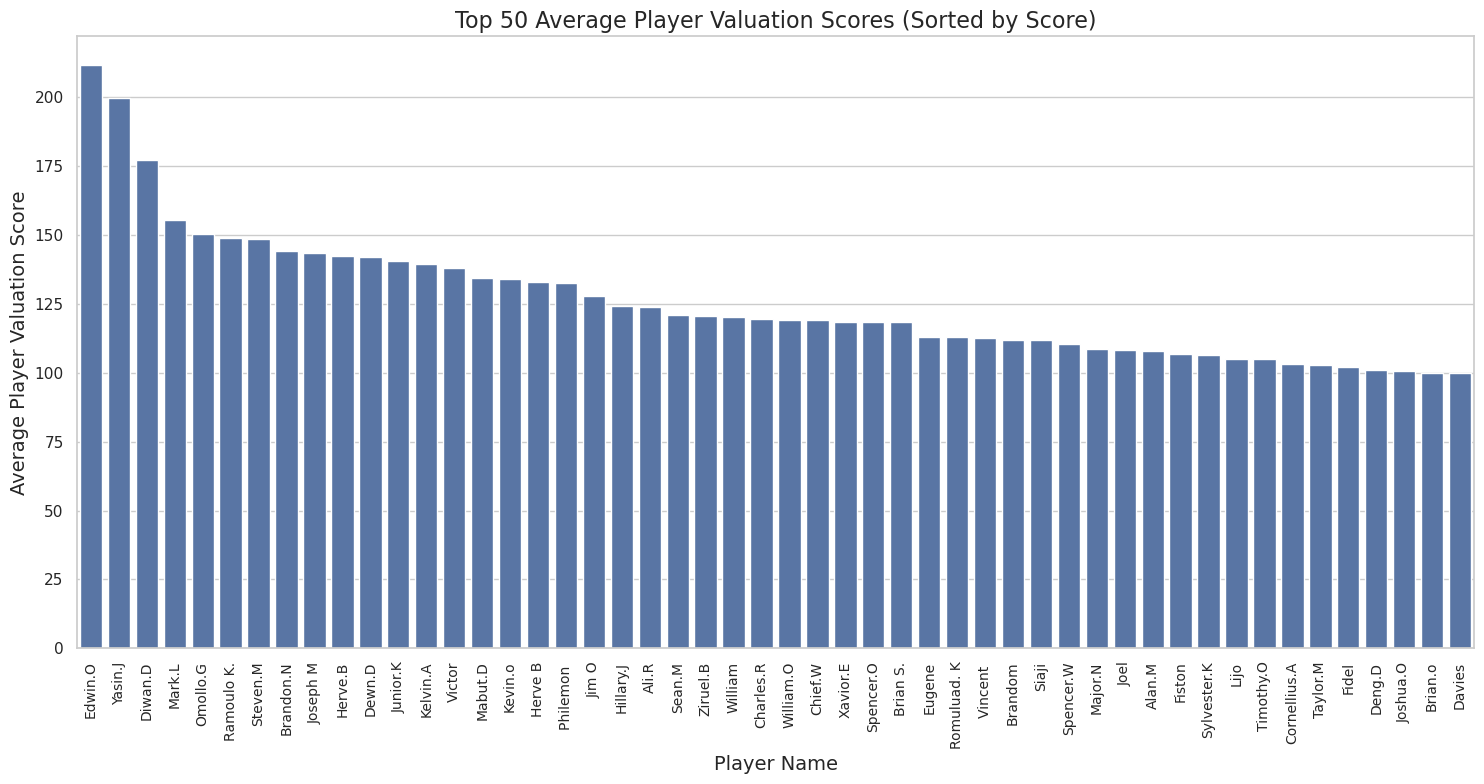

In [13]:
# Group by player_name and calculate the mean player valuation score
average_player_valuation_df = players_stats_df.groupby('player_name')['player_valuation_score'].mean().reset_index()

# Sort players by their average valuation score (descending order)
average_player_valuation_df = average_player_valuation_df.sort_values(by='player_valuation_score', ascending=False)

# subset data
average_player_valuation_df = average_player_valuation_df.head(50)

# Plot the data
plt.figure(figsize=(15, 8))
sns.barplot(x='player_name', y='player_valuation_score', data=average_player_valuation_df)

# Enhance the plot
plt.title('Top 50 Average Player Valuation Scores (Sorted by Score)', fontsize=16)
plt.xlabel('Player Name', fontsize=14)
plt.ylabel('Average Player Valuation Score', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


Correlation Matrix:
                         offensive_contribution  defensive_contribution  \
offensive_contribution                1.000000                0.106018   
defensive_contribution                0.106018                1.000000   
playmaking                            0.054989                0.002215   
rebound_percentage                    0.094809               -0.021800   
player_valuation_score                0.880975                0.562622   

                        playmaking  rebound_percentage  player_valuation_score  
offensive_contribution    0.054989            0.094809                0.880975  
defensive_contribution    0.002215           -0.021800                0.562622  
playmaking                1.000000            0.049254                0.050690  
rebound_percentage        0.049254            1.000000                0.102944  
player_valuation_score    0.050690            0.102944                1.000000  


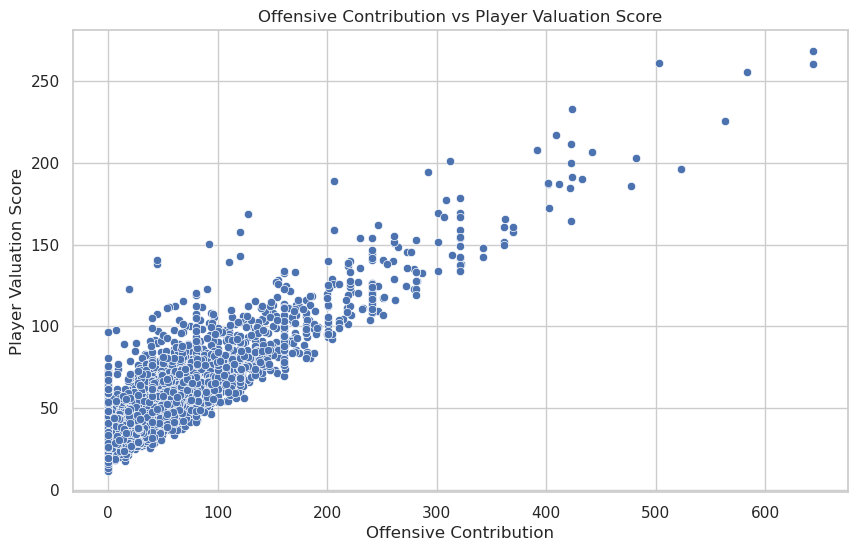

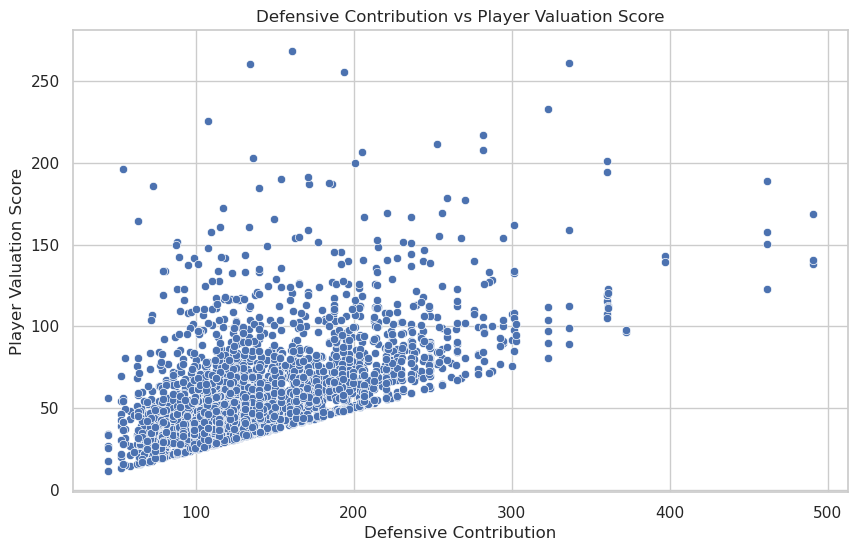

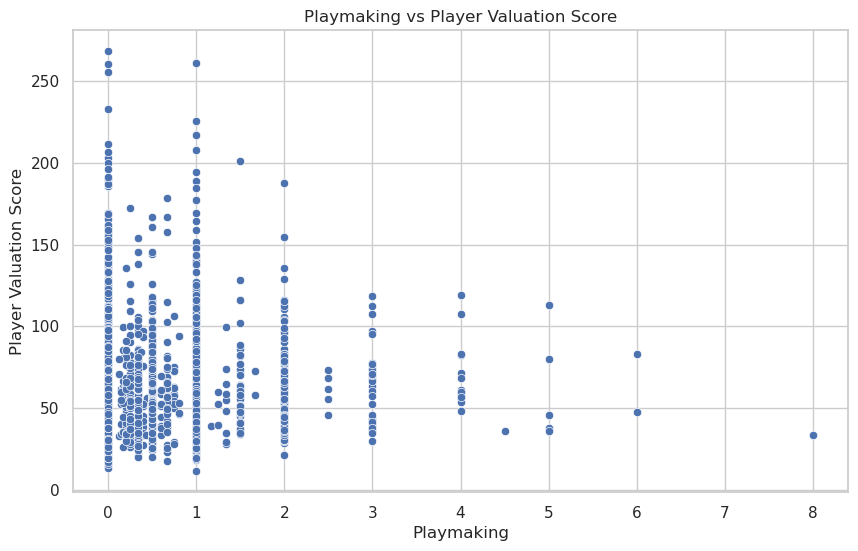

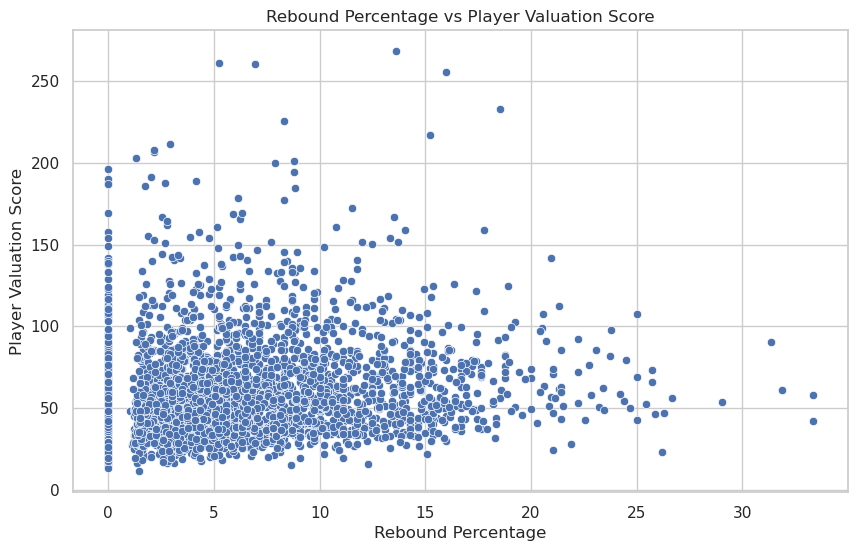

In [14]:
# Correlation matrix to check relationships between various contributions and player valuation score
correlation_matrix_clean = players_stats_df[
    [
        "offensive_contribution",
        "defensive_contribution",
        "playmaking",
        "rebound_percentage",
        "player_valuation_score",
    ]
].corr()
print("Correlation Matrix:\n", correlation_matrix_clean)

# Scatterplot to visualize relationships between various contributions and player valuation score
independent_vars = [
    "offensive_contribution",
    "defensive_contribution",
    "playmaking",
    "rebound_percentage",
    "player_valuation_score",
]

for var in independent_vars:
    if var == "player_valuation_score":
        continue

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=var, y="player_valuation_score", data=players_stats_df)
    var = var.replace("_", " ").title()
    plt.title(f"{var} vs Player Valuation Score")
    plt.xlabel(var)
    plt.ylabel("Player Valuation Score")
    plt.show()

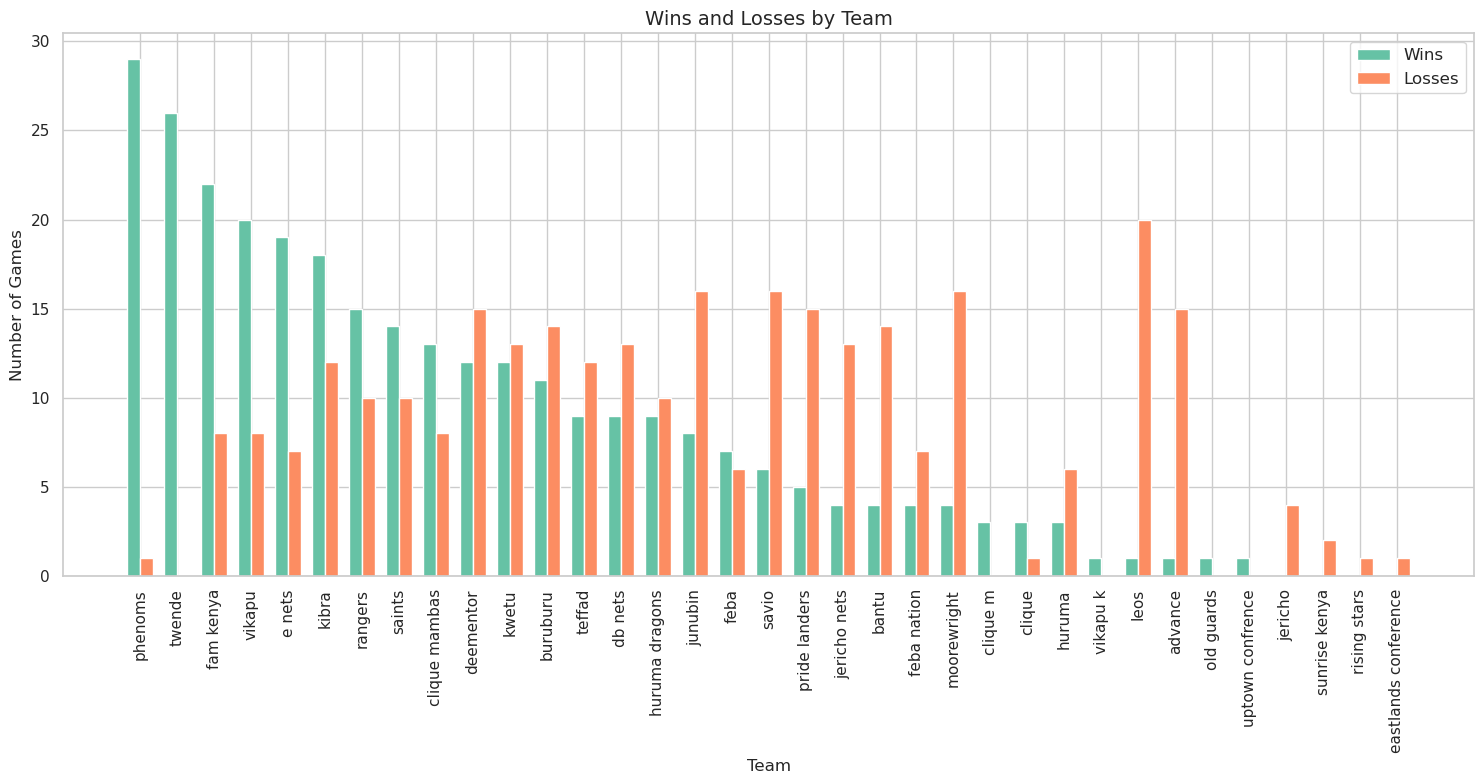

In [15]:
teams_df = teams_df.sort_values(by="wins", ascending=False)
# Set Seaborn's default style for better aesthetics
sns.set(style="whitegrid")

# Create the bar plot with Seaborn styling using plt
plt.figure(figsize=(15, 8))

# Set up index for positioning
index = np.arange(len(teams_df['team']))
bar_width = 0.35

# Use Seaborn's color palette for improved visuals
colors = sns.color_palette("Set2", 2)  # You can choose other palettes like "Set1", "Paired", etc.

# Plot wins
plt.bar(index, teams_df['wins'], bar_width, color=colors[0], label='Wins')

# Plot losses next to wins
plt.bar(index + bar_width, teams_df['losses'], bar_width, color=colors[1], label='Losses')

# Add labels and title
plt.xlabel('Team', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.title('Wins and Losses by Team', fontsize=14)

# Show team names on the x-axis, centered between the two bars
plt.xticks(index + bar_width / 2, teams_df['team'], rotation=90)

# Add a legend with improved placement and style
plt.legend(loc='upper right', fontsize=12)

# Show the plot with tight layout for better spacing
plt.tight_layout()
plt.show()

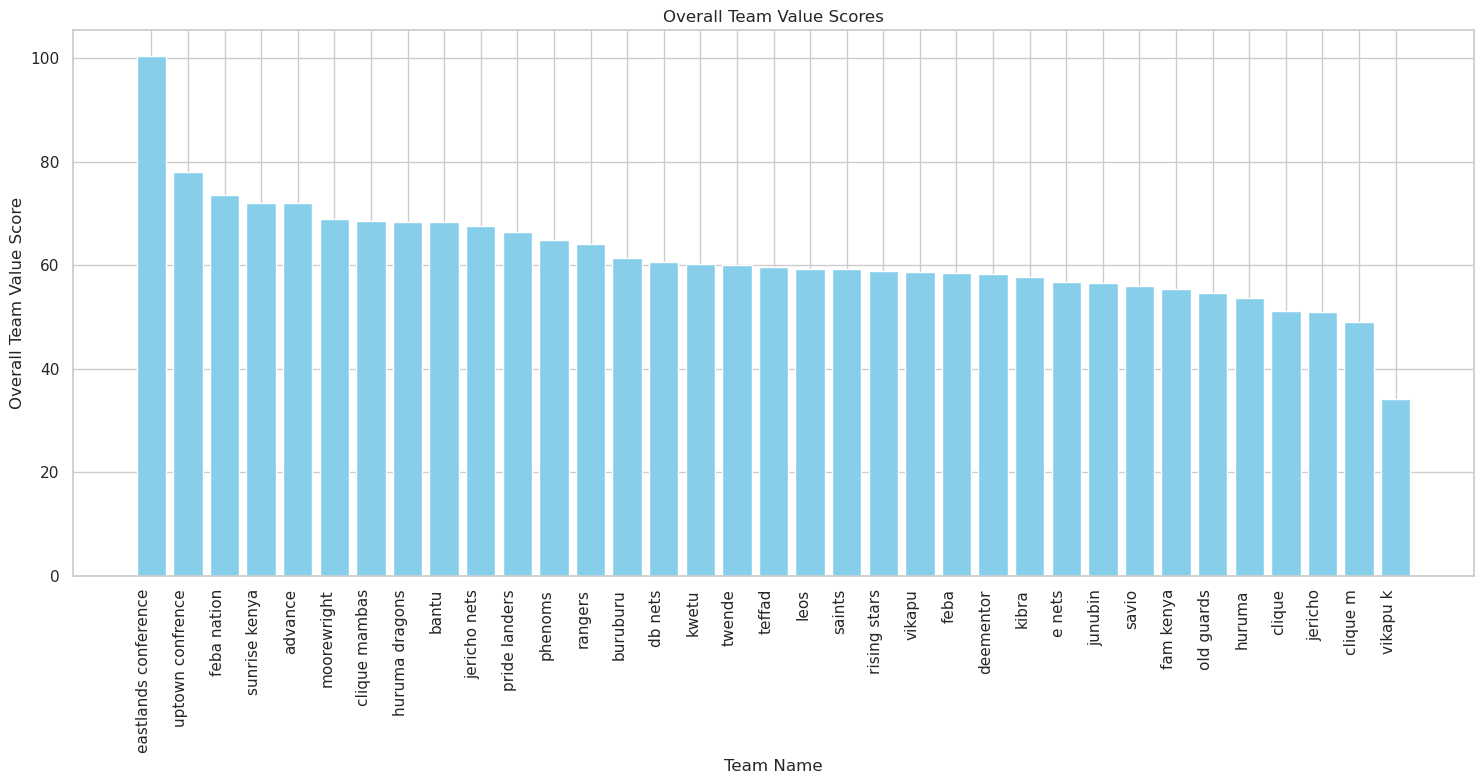

In [16]:
# Calculate average PVS per game
average_pvs_per_game = players_stats_df.groupby(['game_id', 'player_team'])['player_valuation_score'].mean().reset_index()

# Rename the column to clarify it is average PVS
average_pvs_per_game.rename(columns={'player_valuation_score': 'average_pvs'}, inplace=True)

# Calculate overall average PVS for each team
overall_team_value_score = average_pvs_per_game.groupby('player_team')['average_pvs'].mean().reset_index()

# Rename column for clarity
overall_team_value_score.rename(columns={'average_pvs': 'overall_team_value_score'}, inplace=True)

# sort
overall_team_value_score = overall_team_value_score.sort_values(by='overall_team_value_score', ascending=False)

# Create a bar plot for overall team value scores
plt.figure(figsize=(15, 8))

# Plot team names on the x-axis and their valuation scores on the y-axis
plt.bar(overall_team_value_score['player_team'], overall_team_value_score['overall_team_value_score'], color='skyblue')

# Add labels and title
plt.title('Overall Team Value Scores')
plt.xlabel('Team Name')
plt.ylabel('Overall Team Value Score')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Show the plot
plt.tight_layout()
plt.show()